In [13]:
import pandas as pd

def get_data(curr_data, space):
    data = pd.read_csv(curr_data)
    prev_data = np.asarray(data['Radians'])

    shape = prev_data.shape
    print shape
    N = shape[0] #number of data points

    prev_hist, prev_bin_edges = np.histogram(prev_data, 180)

    prev_list = list(prev_hist)
    #print("prev list", prev_list)
    prev_float = [float(x) for x in prev_list]
    percent_prev = [x/25*100 for x in prev_float]
    print("percent", percent_prev)
    
    bottom = 8
    max_height = 4

    theta = np.linspace((0.0+space), np.pi, 180, endpoint=False)
    print theta

    radii = percent_prev
    print radii
    width = (np.pi)/((180))
    
    return [theta, radii, width, bottom]

prev = '/Users/Kristen/Desktop/02232017_BudSampling_Dark/prev_bud_vs_new_bud.csv'
#bud = '/Users/Kristen/Desktop/02232017_BudSampling_Dark/prev_bud_vs_target.csv'

prev_data = get_data(prev, 0)
#target_data = get_data(bud, 0)

all_data = [prev_data, target_data]
colors = ["#708090", "#bebebe"]

ax = plt.subplot(111, polar=True)
prev_bars = ax.bar(prev_data[0], prev_data[1], width=prev_data[2], color="#bebebe", bottom=prev_data[3])
#target_bars = ax.bar(target_data[0], target_data[1], width=target_data[2], color="#bebebe", bottom=target_data[3]) 
ax.set_yticklabels([])

ax.set_rmax(60)

#save_to = '/Users/Kristen/Desktop/02232017_BudSampling_Dark/PrevBud_vs_NewBud.pdf'
#plt.savefig(save_to)

plt.show()

(120,)
('percent', [4.0, 4.0, 8.0, 4.0, 8.0, 0.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 20.0, 0.0, 8.0, 4.0, 8.0, 0.0, 8.0, 4.0, 8.0, 8.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 8.0, 4.0, 12.0, 0.0, 8.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 0.0, 8.0, 8.0, 4.0, 0.0, 8.0, 4.0, 0.0, 4.0, 12.0, 4.0, 4.0, 4.0, 8.0, 20.0, 4.0, 8.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 8.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0])
[ 0.          0.01745329  0.03490659  0.05235988  0.06981317  0.08726646


NameError: name 'target_data' is not defined

In [7]:
import random
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
%matplotlib inline


def run_360_simulation(x):
    pol_eff_aves = []
    for i in range(x):
        ave = run_once_360()
        pol_eff_aves.append(ave)
    #print pol_eff_aves
    final_ave = np.mean(pol_eff_aves)
    return final_ave

def run_180_simulation(x):
    pol_eff_aves = []
    all_cos = []
    for i in range(x):
        ave, cos = run_once_180()
        pol_eff_aves.append(ave)
        all_cos.append(cos)
    final_ave = np.mean(pol_eff_aves)
    return final_ave, all_cos

def run_once_360():
    
    bud = [random.uniform((-180),(180)) for r in xrange(200)]
    target = [random.uniform((-180),(180)) for r in xrange(200)]
    
    plt.scatter(np.asarray(bud), np.asarray(target))
    plt.xlim(-180,180)
    plt.ylim(-180,180)
    plt.show()

    cos_values = []
    diff = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
    
    plt.scatter(np.asarray(diff), np.asarray(cos_values))
    plt.xlim(-180,180)
    plt.ylim(-1,1)
    plt.show()
    
    ave = np.mean(cos_values)
    return ave
    
def run_once_180():
    
    bud = [random.uniform((-40),(40)) for r in xrange(30)]
    target_first = [random.uniform((30),(150)) for r  in xrange(30)] 
    
    target = [x+0 for x in target_first]

    cos_values = []
    diff = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
    
    
    #plt.scatter(np.asarray(bud), np.asarray(target))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Bud vs Target')
    #plt.show()
    
    #plt.scatter(np.asarray(target), np.asarray(diff))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Target vs Diff')
    #plt.show()
    
    #plt.scatter(np.asarray(bud), np.asarray(diff))
    #plt.xlim(-90,90)
    #plt.ylim(-90,90)
    #plt.xlabel('Bud vs Diff')
    #plt.show()
    
    ave = np.mean(cos_values)
    return ave, cos_values    


#run_360_simulation(1)
#final_ave, all_cos = run_180_simulation(10000)

#cos = np.asarray(all_cos)
#print cos.shape
#all_means = []
#all_std = []
#for c in cos:
    #curr_mean = np.mean(c)
    #curr_std = np.std(c)
    #all_means.append(curr_mean)
    #all_std.append(curr_std)
    
#mean, sigma = np.mean(all_means), np.mean(all_std)

#ci = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma/math.sqrt(10000))
#print ci
#print mean

#xs = [x for x in xrange(10000)]

#plt.scatter(xs, all_means)


In [3]:
def run_once_180():
    
    bud = [random.uniform((0),(180)) for r in xrange(30)]
    target = [random.uniform((0),(180)) for r  in xrange(30)] 

    cos_values = []
    diff = []
    diff_rads = []
    for x,y in zip(bud, target):
        curr_diff = abs(x-y)
        #curr_diff = x-y
        diff.append(curr_diff)
        rads = curr_diff*(np.pi/180)
        diff_rads.append(rads)
        curr_cos = math.cos(rads)
        cos_values.append(curr_cos)
        
    normal_rads = [x/np.pi for x in diff_rads]
    
    ave = np.mean(cos_values)
    return ave, cos_values, diff_rads, normal_rads


def run_180_simulation(x):
    pol_eff_aves = []
    all_cos = []
    norm_rads = []
    for i in range(x):
        ave, cos, rads, normal_rads = run_once_180()
        pol_eff_aves.append(ave)
        all_cos.append(cos)
        norm_rads.append(normal_rads)
    final_ave = np.mean(pol_eff_aves)
    return final_ave, all_cos, norm_rads


#ave, cos, rads, normal_rads = run_once_180()

#a, b, c = run_180_simulation(100)

-0.97924394732029141

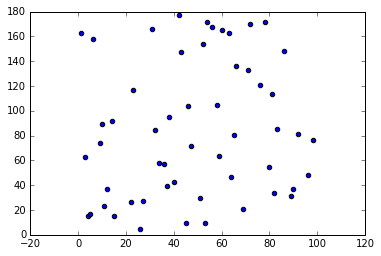

In [8]:
def run_once():
    
    bud = 0
    target = [random.uniform((0),(360)) for r in xrange(100)] 
    candidates = range(0,180)
    target_weighted = np.random.choice(candidates, 100, prob_dist)
    
    rads = []
    for y in target:
        theta = y - bud
        radians = theta*(np.pi/180)
        rads.append(radians)
        
    return rads

def run_simulation(x):
    values = []
    for i in xrange(x):
        theta = run_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

pol, values = run_simulation(100)

rads = run_once()
degrees = [x*(180/np.pi) for x in rads]

xs = xrange(100)

plt.ylim(0, 180)
plt.scatter(xs, degrees)
pol

In [5]:
prob_dist = [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 16.0, 0.0, 8.0, 4.0, 16.0, 8.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 12.0, 4.0, 8.0, 4.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 8.0, 8.0, 0.0, 12.0, 12.0, 4.0, 12.0, 4.0, 0.0, 4.0, 4.0, 4.0, 8.0, 4.0, 0.0, 4.0, 4.0, 8.0, 4.0, 8.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 8.0, 0.0, 4.0, 4.0, 8.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 8.0, 0.0, 12.0, 8.0, 4.0, 0.0, 4.0, 8.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 8.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 8.0, 0.0, 4.0, 4.0, 0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 8.0, 0.0, 4.0, 4.0, 0.0, 4.0, 0.0, 4.0]

bud_dist = [4.0, 4.0, 8.0, 4.0, 8.0, 0.0, 8.0, 0.0, 0.0, 8.0, 12.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 20.0, 0.0, 8.0, 4.0, 8.0, 0.0, 8.0, 4.0, 8.0, 8.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 16.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 8.0, 4.0, 12.0, 0.0, 8.0, 0.0, 0.0, 4.0, 0.0, 0.0, 8.0, 0.0, 8.0, 8.0, 4.0, 0.0, 8.0, 4.0, 0.0, 4.0, 12.0, 4.0, 4.0, 4.0, 8.0, 20.0, 4.0, 8.0, 4.0, 4.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 8.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 4.0, 0.0, 0.0, 4.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0]

[ 84  96 131  37  83  89 124 148  78 130 107  76  76  46 176 179 118  63
 143  67  54   0  36  61 147  99  16 175  88 115]
[123   5  73  83 173  48  85 136 175  98 144   9   9  96 105 150 153  50
  38 133   5 173   1  72  96  76 132 170  40   8]
0.990765238715
1.98153047743
56.7666666667
0.630740740741


0.36925925925925907

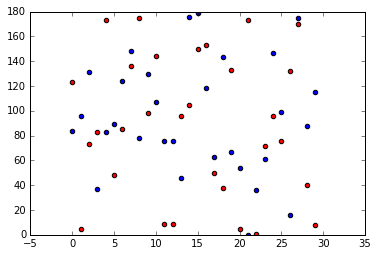

In [9]:
def run_once():
    
    prev_bud = 0
    new_bud = [random.uniform((0),(180)) for r in xrange(30)] 
    target = [random.uniform((0),(180)) for r in xrange(30)] 
    candidates = range(0,180)
    target_weighted = np.random.choice(candidates, 30, prob_dist)
    print target_weighted
    new_bud_weighted = np.random.choice(candidates, 30, bud_dist)
    print new_bud_weighted
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    xs = range(0,30)
    ax1.scatter(xs, target_weighted, c='b')
    ax1.scatter(xs, new_bud_weighted, c='r')
    
    rads = []
    for x,y in zip(target_weighted, new_bud_weighted):
        theta = abs(x-y)
        radians = theta*(np.pi/180)
        rads.append(radians)
        
    return rads

def run_simulation(x):
    values = []
    for i in xrange(x):
        theta = run_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

#pol, values = run_simulation(1)

rads = run_once()
pol_eff = 1 - 2*(np.mean(rads)/np.pi)
print np.mean(rads)
print 2*(np.mean(rads))
print np.mean(rads)*(180/np.pi)
print 2*(np.mean(rads)/np.pi)
degrees = [x*(180/np.pi) for x in rads]

xs = range(0,30)

plt.ylim(0, 180)
#plt.scatter(xs, degrees)
pol
pol_eff

In [10]:
reverse = list(prob_dist)
reverse.reverse()
new_target_dist = prob_dist + reverse
print len(new_target_dist)

bud_rev = list(bud_dist)
bud_rev.reverse()
new_bud_dist = bud_dist + bud_rev
print(len(new_bud_dist))


360
360


In [65]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

def run_once():
    
    #new_bud = [random.uniform((-90),(90)) for r in xrange(30)] 
    
    target = [random.uniform((45),(315)) for r in xrange(3000)]
    
    bud_1 = [random.uniform((260),(360)) for r in xrange(1500)]
    bud_2 = [random.uniform((0),(100)) for r in xrange(1500)]
    final_bud = bud_2 + bud_1
    
    
    #candidates = range(0,360)
    #print len(candidates)
    #print len(new_bud_dist)
    #target_weighted = np.random.choice(candidates, 30, p=new_target_dist)
    #print target_weighted
    #print np.mean(target_weighted)
    #new_bud_weighted = np.random.choice(candidates, 30, p=new_bud_dist)
    #print new_bud_weighted
    #print np.mean(new_bud_weighted)
    
    rads = []
    degs = []
    for x,y in zip(target, final_bud):
        theta = abs(x-y)
        #print theta
        if theta > 180:
            theta = 360 - theta
        #if theta < 40:
            #theta = theta/2
        #elif theta >= 40:
            #theta = theta - 40
        degs.append(theta)
        radians = theta*(np.pi/180)
        rads.append(radians)
    #print degs
    #print np.mean(degs)
    return rads

def run_simulation(x):
    values = []
    for i in xrange(x):
        theta = run_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

rads = run_once()
degrees = [x*(180/np.pi) for x in rads]
print np.mean(degrees)

xs = range(0,30)

#plt.ylim(0, 180)
#plt.scatter(xs, degrees)

pol_eff = 1 - 2*(np.mean(rads)/np.pi)
print pol_eff

sim_pol_eff, all_runs = run_simulation(1000)
print sim_pol_eff
print np.mean(all_runs)*(180/np.pi)

102.100259544
-0.134447328269
-0.135710077899
102.213907011


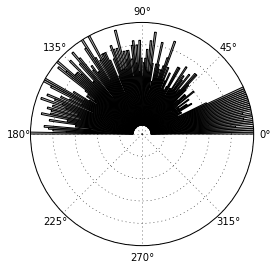

In [14]:
%matplotlib inline

def get_data(diff):

    N = len(diff)

    prev_hist, prev_bin_edges = np.histogram(diff, 180)

    prev_list = list(prev_hist)
    prev_float = [float(x) for x in prev_list]
    percent_prev = [x/25*100 for x in prev_float]
    
    bottom = 8
    max_height = 4

    theta = np.linspace((0.0), np.pi, 180, endpoint=False)
    #print theta

    radii = percent_prev
    #print radii
    width = (np.pi)/((180))
    
    return [theta, radii, width, bottom]


prev_data = get_data(rads)
#target_data = get_data(bud, 0)

colors = ["#708090", "#bebebe"]

ax = plt.subplot(111, polar=True)
prev_bars = ax.bar(prev_data[0], prev_data[1], width=prev_data[2], color="#bebebe", bottom=prev_data[3])
#target_bars = ax.bar(target_data[0], target_data[1], width=target_data[2], color="#bebebe", bottom=target_data[3]) 
ax.set_yticklabels([])

ax.set_rmax(100)

#save_to = '/Users/Kristen/Desktop/02232017_BudSampling_Dark/PrevBud_vs_NewBud.pdf'
#plt.savefig(save_to)

plt.show()

In [20]:
#how do the measurements of cells that don't respond affect the Pol Eff?
0.125*np.pi*(180/np.pi)

22.5

wide polarization:  0.745522463354
N points:  27
tight polarization:  0.824013687627
N points:  24
at r =  55.3597951158  pol eff =  0.38489116538 

at r =  90.0538205731  pol eff =  -0.000598006367267 

at r =  92.8363636345  pol eff =  -0.031515151494 



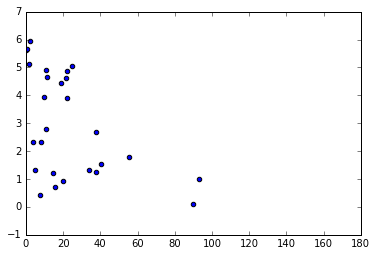

In [41]:
directory = '/Users/Kristen/Desktop/DATA/FINISHED/Bem1_Variants_Polarization/05212015/WYK8308_Pol_Expt/processedImages/new_bud_vs_target.csv'
data = pd.read_csv(directory)
degrees = np.asarray(data['Degrees'])
n = len(degrees)
ys = [random.uniform((0),(6)) for r in xrange(n)]

rads = np.asarray(data['Radians'])

small_rads = []
big_rads = []
for r in rads:
    if r < (np.pi/4):
        small_rads.append(r)
    elif r > (np.pi/4):
        big_rads.append(r)

tight_pol = np.asarray(small_rads)        

pol_eff = 1-2*(np.mean(rads)/np.pi)
print "wide polarization: ", pol_eff
print "N points: ", len(rads)

tight_pol_eff = 1-2*(np.mean(tight_pol)/np.pi)
print "tight polarization: ", tight_pol_eff
print "N points: ", len(small_rads)

for r in big_rads:
    pol = 1-2*(r/np.pi)
    print "at r = ", r*(180/np.pi), " pol eff = ", pol, "\n" 

plt.scatter(degrees, ys)
plt.xlim(0,180)
plt.show()

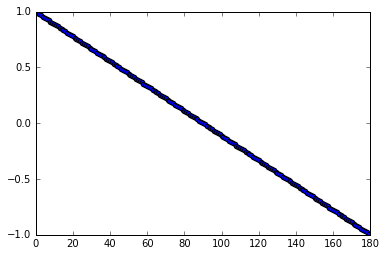

In [39]:
pol_eff = []
for x in range(0,180):
    radians = x*(np.pi/180)
    y = 1-2*(np.mean(radians)/np.pi)
    pol_eff.append(y)

xs = range(0,180)
plt.scatter(xs, pol_eff)
plt.xlim(0,180)
plt.ylim(-1,1)
plt.show()

In [73]:
def run_bias_once():
    
    diff_respond = [random.uniform((0),(45)) for r in xrange(15)]
    diff_no_respond = gen_avg()
    diff = diff_respond + diff_no_respond
    #diff = diff_respond 
    rads = [x*(np.pi/180) for x in diff]
    
    return rads

def gen_avg(expected_avg=102, n=5, a=46, b=92):
    while True:
        l = [random.randint(a, b) for i in range(n)]
        avg = reduce(lambda x, y: x + y, l) / len(l)

        if avg == expected_avg:
            return l

rads = run_bias_once()
degrees = [x*(180/np.pi) for x in rads]
print np.mean(degrees)

xs = range(0,30)

#plt.ylim(0, 180)
#plt.scatter(xs, degrees)

pol_eff = 1 - 2*(np.mean(rads)/np.pi)
print pol_eff


def simulation(x):
    values = []
    for i in xrange(x):
        theta = run_bias_once()
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol

simulation(100)

42.2128646209
0.530968170879


0.52671699649540038

In [74]:
0.75-0.52671699649540038

0.22328300350459962

In [292]:
import random
def run_bias_once(total_n, pol_number, average):
    
    diff_respond = [random.uniform((0),(45)) for r in xrange(pol_number)]
    n = total_n - pol_number
    if n > 0:
        diff_no_respond = gen_avg(n, average)
        diff = diff_respond + diff_no_respond
    elif n == 0:
        diff = diff_respond
    rads = [x*(np.pi/180) for x in diff]
    
    return rads

def gen_avg(n, expected_avg, a=46, b=180):
    while True:
        l = [random.randint(a, b) for i in range(n)]
        avg = reduce(lambda x, y: x + y, l) / len(l)
        if avg == expected_avg:
            return l
        
def simulation(x, total_n, pol_number, average):
    values = []
    for i in xrange(x):
        theta = run_bias_once(total_n, pol_number, average)
        values.append(theta)
    pol = 1 - 2*(np.mean(values)/np.pi)
    return pol, values

def simulate_new_eqn(x, total_n, pol_number, average):
    values = []
    for i in xrange(x):
        theta = run_bias_once(total_n, pol_number, average)
        values.append(theta)
    pol = 1.1357 - 2*(np.mean(values)/np.pi)
    return pol, values

pol_eff = []
angles = []
for i in range(11):
    pol, ave_angle = simulation(1000,10,i,102)
    pol_eff.append(pol)
    angles.append(np.mean(ave_angle)*(180/np.pi)) 
print pol_eff 
print angles

non_bias_pol_eff = []
for i in range(11):
    print i
    pol_non_bias, ave_angle_non_bias = simulation(1000,10,i,90)
    non_bias_pol_eff.append(pol_non_bias)
    
pol_new = []
angles_new = []
for i in range(10):
    pol_new_eqn, ave_angle_new_eqn = simulate_new_eqn(10,10,i,102)
    pol_new.append(pol_new_eqn)
    angles_new.append(np.mean(ave_angle)*(180/np.pi)) 
    
print len(pol_new)

[-0.13830444444444456, -0.048952872291323279, 0.038978225803714794, 0.12682460491493419, 0.21723847999434598, 0.3051115572707469, 0.39679765053602678, 0.48327851027501068, 0.57322635596500815, 0.66281111232837864, 0.74608498147610458]
[102.4474, 94.405758506219087, 86.491959677665676, 78.585785557655925, 70.448536800508862, 62.539959845632779, 54.28821145175759, 46.504934075249039, 38.409627963149269, 30.346999890445925, 22.852351667150582]
0
1
2
3
4
5
6
7
8
9
10
10


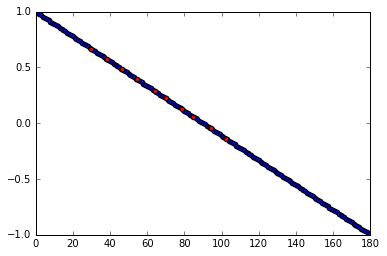

In [86]:
pol_eff_control = []
for x in range(0,180):
    radians = x*(np.pi/180)
    y = 1-2*(np.mean(radians)/np.pi)
    pol_eff_control.append(y)

xs = range(0,180)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xs, pol_eff_control, c='b')
ax1.scatter(angles, pol_eff, c='r')
plt.xlim(0,180)
plt.ylim(-1,1)
plt.show()

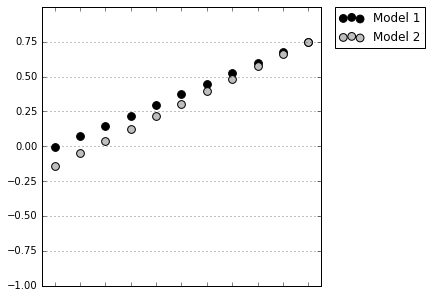

In [319]:
%matplotlib inline
fig_size = [5,5]
plt.rcParams["figure.figsize"] = fig_size

xs = [0,10,20,30,40,50,60,70,80,90,100]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(xs, non_bias_pol_eff, s=60, c='k', label="Model 1")
ax1.scatter(xs, pol_eff, s=60, c='#bebebe', label="Model 2")
plt.xlim(-5,105)
plt.ylim(-1,1)
ax1.legend()
ax1.set_yticks(np.arange(-1.0,1,0.25))
ax1.set_xticks(np.arange(0,105,10))
plt.rc('grid', linestyle=":", color='black')
plt.tick_params(axis='x',which='both',bottom='on', top='on', labelbottom='off')
ax1.yaxis.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
save_to = '/Users/Kristen/Desktop/12132016/Bias_Models.pdf'
plt.savefig(save_to)

plt.show()

In [129]:
diffs = []
for bias,rand in zip(pol_eff, non_bias_pol_eff):
    diff = rand - bias
    diffs.append(diff)
print diffs

[0.1333633333333335, 0.12027648559286819, 0.10638473221249689, 0.092942270970840624, 0.078136173266875497, 0.066512958755130969, 0.053804363364791774, 0.04188310218265423, 0.026084768659277779, 0.010799495289869787]


In [135]:
print pol_eff
print non_bias_pol_eff

[-0.13843333333333341, -0.05001785009651516, 0.038733270342674597, 0.12896656731700729, 0.21871179492320092, 0.3063306042940972, 0.39421314819224207, 0.48158137002168422, 0.5726820382274036, 0.66354277173110221]
[-0.0050699999999999079, 0.070258635496353028, 0.14511800255517149, 0.22190883828784791, 0.29684796819007642, 0.37284356304922817, 0.44801751155703384, 0.52346447220433845, 0.59876680688668138, 0.674342267020972]


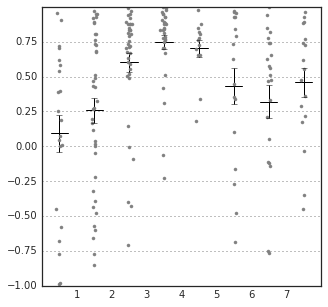

In [271]:
import os
import math

%matplotlib inline
fig_size = [5,5]
plt.rcParams["figure.figsize"] = fig_size


bem1_names = ['WYK8308_Control_Pol','WYK8308_001Pulse_Pol','WYK8308_1Pulse_Pol', 'WYK8308_2Pulse_Pol', 'WYK8308_3Pulse_Pol', 'WYK8308_30Sec_Pol','WYK8308_15Sec_Pol', 'WYK8308_10Sec_Pol']
cdc24_names = ['WYK8440_Control_Pol','WYK8440_001Pulse_Pol','WYK8440_1Pulse_Pol', 'WYK8440_2Pulse_Pol', 'WYK8440_3Pulse_Pol', 'WYK8440_30Sec_Pol','WYK8440_15Sec_Pol', 'WYK8440_10Sec_Pol']

names_for_expt = ['DS377_Expt', 'DS381_PolarizationEff', 'DS382_PolarizationEff', 'WYK8308_Pol_Expt']
names_for_control = ['DS377_Control', 'DS381_Control', 'DS382_Control', 'WYK8308_Pol_Control']


directory = '/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Control'
all_directories = [name for name in os.listdir(directory)]
all_directories = all_directories[1:]

extracted_pol = {}
extracted_sem = {}
extracted_ave = {}
for name in all_directories: 
    curr_dir = os.path.join(directory, name)
    for f in os.listdir(curr_dir):
        if f == "new_bud_vs_target.csv" or f == "Polarization_Efficiency.csv":
            current_file = os.path.join(curr_dir, f)
            data = pd.read_csv(current_file)
            rads = np.asarray(data['Radians'])
            pol_eff = []
            for r in rads:
                pol = 1-2*(np.mean(r)/np.pi)
                pol_eff.append(pol)
            std = np.std(np.asarray(pol_eff))
            num_cells = float(len(pol_eff))
            sem = std/(math.sqrt(num_cells))
            
            extracted_pol[name] = pol_eff
            extracted_sem[name] = sem
            extracted_ave[name] = np.mean(pol_eff)

fig = plt.figure()
ax = fig.gca()
data_pol = []
data_ave = []
data_sem = []
for curr_data in bem1_names:
    pol = extracted_pol[curr_data]
    data_pol.append(pol)
    
    ave = extracted_ave[curr_data]
    data_ave.append(ave)
    
    sem = extracted_sem[curr_data]
    data_sem.append(sem)
    
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='black')

bp = plt.boxplot(data_pol, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
for i, n in enumerate([1,2,3,4,5,6,7,8]):
    #print n
    y = data_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='gray', marker='.', linestyle='')

#x = np.random.normal([1,2,3,4,5,6,7,8], 0.04, size=len(pol_eff))
#plt.plot(x, pol_eff, 'r.')
plt.ylim(-1,1)
ax.set_xticks(np.arange(1.5,8.5,1))
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()


plt.errorbar([1,2,3,4,5,6,7,8], data_ave, yerr=data_sem, fmt=None, ecolor='k')

save_to = '/Users/Kristen/Desktop/12132016/PULSED_POLARIZATION/WYK8308_Pulsed_Polarization/Bem1_PolEff_Scatter.pdf'
#plt.savefig(save_to)

plt.show()

In [263]:
diff = [random.uniform((0),(np.pi)) for r in range(100)]

pol_1 = np.mean(1-2*(np.asarray(diff)/np.pi))
pol_2 = 1-2*(np.mean(diff)/np.pi)
print pol_1
print pol_2

-0.190579253967
-0.190579253967


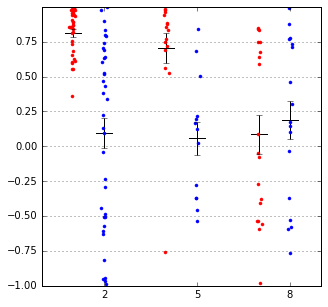

In [327]:
names_for_expt = ['WYK8440_Pol','Cdc24deltaPB1_Pol', 'GEF_Dead_Pol']
names_for_control = ['WYK8440_Pol_Control', 'Cdc24deltaPB1_Control', 'GEF_Dead_Control']

bem1_expt = ['WYK8308_Pol_Expt','DS377_Expt', 'DS381_PolarizationEff', 'DS382_PolarizationEff']
bem1_control = ['WYK8308_Pol_Control', 'DS377_Control', 'DS381_Control', 'DS382_Control']

expt_dir = '/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Expt'
control_dir = '/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Control'

def extract_all_data(directory, file_names):
    extracted_pol = {}
    extracted_sem = {}
    extracted_ave = {}
    for name in os.listdir(directory): 
        curr_dir = os.path.join(directory, name)
        for f in os.listdir(curr_dir):
            #print curr_dir
            if f == "new_bud_vs_target.csv" or f == "Polarization_Efficiency.csv":
                current_file = os.path.join(curr_dir, f)
                data = pd.read_csv(current_file)
                rads = np.asarray(data['Radians'])
                pol_eff = []
                for r in rads:
                    pol = 1-2*(np.mean(r)/np.pi)
                    pol_eff.append(pol)
                std = np.std(np.asarray(pol_eff))
                num_cells = float(len(pol_eff))
                sem = std/(math.sqrt(num_cells))
            
                extracted_pol[name] = pol_eff
                extracted_sem[name] = sem
                extracted_ave[name] = np.mean(pol_eff)
                
    data_pol = []
    data_ave = []
    data_sem = []
    for curr_data in file_names:
        pol = extracted_pol[curr_data]
        data_pol.append(pol)
    
        ave = extracted_ave[curr_data]
        data_ave.append(ave)
    
        sem = extracted_sem[curr_data]
        data_sem.append(sem)
    return data_pol, data_ave, data_sem


expt_pol, expt_ave, expt_sem = extract_all_data(expt_dir, names_for_expt)
control_pol, control_ave, control_sem = extract_all_data(control_dir, names_for_control)

expt_positions = [1,4,7]
control_positions = [2,5,8]

fig = plt.figure()
ax = fig.gca()

expt_bp = plt.boxplot(expt_pol, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
control_bp = plt.boxplot(control_pol, positions=control_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
for i, n in enumerate(expt_positions):
    y = expt_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='r', marker='.', linestyle='')
    
for i, n in enumerate(control_positions):
    y = control_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='b', marker='.', linestyle='')
    
plt.errorbar(expt_positions, expt_ave, yerr=expt_sem, fmt=None, ecolor='k')
plt.errorbar(control_positions, control_ave, yerr=control_sem, fmt=None, ecolor='k')
    
plt.xlim(0,9)
plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

plt.style.use("dark_background")

save_to = '/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Cdc24Variants_PolEff_Scatter.pdf'
#plt.savefig(save_to)

plt.show()

In [323]:
os.remove('/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Control/.DS_Store')

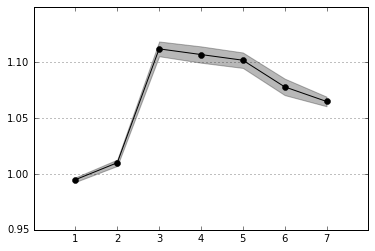

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import numpy as np


cdc24_aves = np.asarray([0.994918024,1.010078671,1.112137858,1.107048428,1.101965875,1.078076392,1.065009316])
cdc24_sem = np.asarray([0.002068975,0.002859911,0.006612854,0.007315045,0.006923803,0.007386059,0.00430549])
#bem1_aves = np.asarray([0.104,-0.19677372,-0.009990297,0.515494087,0.693333333])
#bem1_sem = np.asarray([0.329993939,0.183995626,0.142374284,0.092623438,0.093094934])

#cdc24_raw = pd.read_csv('/Users/Kristen/Desktop/PositiveFeedback_Data/Figure6_Done/Cdc24_Transient.csv')
#bem1_raw = pd.read_csv('/Users/Kristen/Desktop/PositiveFeedback_Data/Figure6_Done/Data/Bem1_Transient.csv')

cdc24_negative_error = np.asarray([a-b for a, b in zip(cdc24_aves, cdc24_sem)])
cdc24_positive_error = np.asarray([a+b for a, b in zip(cdc24_aves, cdc24_sem)])

#bem1_negative_error = np.asarray([a-b for a, b in zip(bem1_aves, bem1_sem)])
#bem1_positive_error = np.asarray([a+b for a, b in zip(bem1_aves, bem1_sem)])

xs = [1,2,3,4,5,6,7]

fig = plt.figure()
ax = fig.gca()
#plt.plot(xs, bem1_aves, color="#3366cc", marker='o')
plt.plot(xs,cdc24_aves, color="k", marker='o')

#plt.plot(xs, negative_error)
plt.fill_between(xs, cdc24_negative_error, cdc24_positive_error, alpha=0.15, edgecolor='k', facecolor='k')
plt.fill_between(xs, cdc24_negative_error, cdc24_positive_error, alpha=0.15, edgecolor='k', facecolor='k')
#plt.fill_between(xs, bem1_negative_error, bem1_positive_error, alpha=0.25, edgecolor='#3366cc', facecolor='#3366cc')
#plt.fill_between(xs, bem1_negative_error, bem1_positive_error, alpha=0.25, edgecolor='#3366cc', facecolor='#3366cc')
plt.xlim(0,8)
plt.ylim(0.95,1.15)
ax.set_yticks(np.arange(0.95,1.15,0.05))
ax.set_xticks(np.arange(1,8,1))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

#cdc24_xs = np.asarray(cdc24_raw['Time'])

#cdc24_ys = np.asarray(cdc24_raw['Pol'])

#bem1_xs = np.asarray(bem1_raw['Time'])

#bem1_ys = np.asarray(bem1_raw['Pol'])



#for i, n in enumerate(list(cdc24_xs)):
    #y = cdc24_ys[i]
    #x = np.random.normal(n, 0.04)
    #plt.plot(x, y, color='k', marker='.', linestyle='')
    
#for i, n in enumerate(list(bem1_xs)):
    #y = bem1_ys[i]
    #x = np.random.normal(n, 0.04)
    #plt.plot(x, y, color='#3366cc', marker='.', linestyle='')

save_to = '/Users/Kristen/Desktop/pulses/ePDZ_pulses.pdf'
plt.savefig(save_to)

plt.show()
#cdc24_raw.head()

In [ ]:
x = np.linspace(0, 30, 30)
y = np.sin(x/6*np.pi)
error = np.random.normal(0.1, 0.02, size=y.shape) +.1
print error
y += np.random.normal(0, 0.1, size=y.shape)
print y

plt.plot(x, y, 'k', color='#CC4F1B')
plt.fill_between(x, y-error, y+error,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import math

cdc24_expt_file = "/Users/Kristen/Desktop/PositiveFeedback_Data/rsr1_data/8278_dip_polarization/Expt/expt_combined.csv"
cdc24_expt_data = pd.read_csv(cdc24_expt_file)

cdc24_control_file = "/Users/Kristen/Desktop/PositiveFeedback_Data/rsr1_data/8278_dip_polarization/Control/control_combined.csv"
cdc24_control_data = pd.read_csv(cdc24_control_file)

def extract_pol_eff_data(df):

    target_x = list(df['Targets X'])
    bud_x = list(df['Bud X'])
    prev_x = list(df['Prev X'])
    pol_eff = []
    difference = []
    rads = []
    for targ, bud in zip(target_x, bud_x):
        diff = abs(targ - bud)
        if diff > 50:
            diff = 100 - diff
        r = diff*(np.pi/50)
        pol = 1-2*(np.mean(r)/np.pi)
        pol_eff.append(pol)
        difference.append(diff)
        rads.append(r)

    return pol_eff

def find_ave_sem(pol):
    std = np.std(np.asarray(pol))
    num_cells = float(len(pol))
    sem = std/(math.sqrt(num_cells))
    ave = np.mean(pol)
    median = np.median(pol)
    print median, std
    return ave, sem

cdc24_expt = extract_pol_eff_data(cdc24_expt_data)
cdc24_ave, cdc24_sem = find_ave_sem(cdc24_expt)

cdc24_control = extract_pol_eff_data(cdc24_control_data)
cdc24_control_ave, cdc24_control_sem = find_ave_sem(cdc24_control)

stat, pvalue = scipy.stats.mannwhitneyu(cdc24_expt, cdc24_control)
print pvalue
if pvalue > 0.05:
    print "NS"
else:
    print "Statistically Significant"

0.6358348508 0.491884464813
0.167899241 0.632491232199
0.00254772149198
Statistically Significant


In [5]:
bem1_expt_file = "/Users/Kristen/Desktop/PositiveFeedback_Data/rsr1_data/07242016_357rsr1_PolAndControl/Polarization/expt_targets_vs_new_bud.csv"
bem1_control_file = "/Users/Kristen/Desktop/PositiveFeedback_Data/rsr1_data/07242016_357rsr1_PolAndControl/Control/control_targets_vs_new_bud.csv"

bem1_expt_data = pd.read_csv(bem1_expt_file)
bem1_control_data = pd.read_csv(bem1_control_file)

def from_rads_get_pol(df):
    rads = np.asarray(df['Radians'])
    pol_eff = []
    for r in rads:
        pol = 1-2*(np.mean(r)/np.pi)
        pol_eff.append(pol)
    return pol_eff

bem_expt = from_rads_get_pol(bem1_expt_data)
bem_ave, bem_sem = find_ave_sem(bem_expt)

bem_control = from_rads_get_pol(bem1_control_data)
bem_control_ave, bem_control_sem = find_ave_sem(bem_control)

stat, pvalue = scipy.stats.mannwhitneyu(bem_expt, bem_control)
print pvalue
if pvalue > 0.05:
    print "NS"
else:
    print "Statistically Significant"

0.718588235496 0.389872183901
0.05466666641 0.552145436386
4.24897014029e-06
Statistically Significant


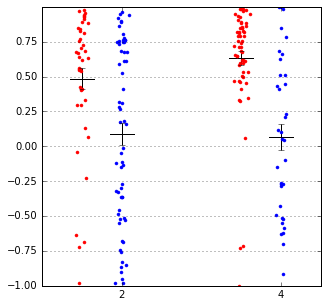

In [482]:
expt_positions = [1.5,3.5]
control_positions = [2,4]

expt = [cdc24_expt, bem_expt]
control = [cdc24_control, bem_control]

expt_sem = [cdc24_sem, bem_sem]
control_sem = [cdc24_control_sem, bem_control_sem]

fig = plt.figure()
ax = fig.gca()

expt_bp = plt.boxplot(expt, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
control_bp = plt.boxplot(control, positions=control_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)

for i, n in enumerate(expt_positions):
    y = expt[i]
    #print y
    x = np.random.normal(n, 0.04, len(y))
    plt.plot(x, y, color='r', marker='.', linestyle='')
    
for i, n in enumerate(control_positions):
    y = control[i]
    x = np.random.normal(n, 0.04, len(y))
    plt.plot(x, y, color='b', marker='.', linestyle='')
    
plt.errorbar(expt_positions, [cdc24_ave, bem_ave], yerr=expt_sem, fmt=None, ecolor='k')
plt.errorbar(control_positions, [cdc24_control_ave, bem_control_ave], yerr=control_sem, fmt=None, ecolor='k')
    
plt.xlim(1,4.5)
plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

save_to = "/Users/Kristen/Desktop/rsr1_data/Rsr1_Polarization_Efficiency.pdf"
plt.savefig(save_to)

plt.show()

In [471]:
epdz_file = "/Users/Kristen/Desktop/PositiveFeedback_Data/ePDZ/new_bud_vs_target.csv"
epdz = pd.read_csv(epdz_file)

epdz_pol = from_rads_get_pol(epdz)
epdz_ave, epdz_sem = find_ave_sem(epdz_pol)
print epdz_ave, epdz_sem

0.208396158045 0.076341950456


In [477]:
area = np.pi*math.pow(r,2)

r = math.sqrt(300)/np.pi
print r

#r pixels = 0.0209
#0.217 µm per pixel

microns = r*0.217

area = np.pi*math.pow(microns,2)
print area

5.51328895422
4.49666826915
